In [1]:
import pandas as pd
import numpy as np 

from transformers import AutoTokenizer
from transformers import BertTokenizerFast
from transformers import BertTokenizer
from transformers import RobertaTokenizerFast

#from transformers import ROBERTAtokenizer
#from transformers import XLNETtokenizer

from mlxtend.text import tokenizer_emoticons
from nltk.tokenize.casual import TweetTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

import re, string
import emoji

In [2]:
df = pd.read_csv('/kaggle/input/masculinity-saturday-twitter-sentiment-analysis/twitter_sentiment_analysis_masculinity_saturday_data_annotated.csv', index_col=0)

In [3]:
df.head()

,tweet_created_at,text,Positive,Negative,Neutral,Compound,Sentiment
0,2022-12-30 22:37:46+00:00,Men who have refused to listen to/attend @amer...,0.000,0.073,0.927,-0.2960,Negative
1,2022-12-30 22:30:58+00:00,@OvOBrezzzy Take amerix next,0.000,0.000,1.000,0.0000,Neutral
2,2022-12-30 22:18:00+00:00,@AyodeleYo11 @amerix Nah I’m good my masculini...,0.493,0.068,0.439,0.8271,Positive
3,2022-12-30 20:42:54+00:00,@Amerix_DontSimp There is no need for dating i...,0.000,0.180,0.820,-0.2960,Negative
4,2022-12-30 20:32:23+00:00,@DyeAnna7 @amerix @kibe From what cos nothing ...,0.110,0.000,0.890,0.6908,Positive


In [4]:
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])

In [5]:
df.shape

(248738, 7)

In [6]:
df.drop_duplicates(subset='text',inplace=True)

In [7]:
df.shape

(236023, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236023 entries, 0 to 248738
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   tweet_created_at  236023 non-null  datetime64[ns, UTC]
 1   text              236023 non-null  object             
 2   Positive          236023 non-null  float64            
 3   Negative          236023 non-null  float64            
 4   Neutral           236023 non-null  float64            
 5   Compound          236023 non-null  float64            
 6   Sentiment         236023 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(2)
memory usage: 14.4+ MB


In [9]:
df.columns

Index(['tweet_created_at', 'text', 'Positive', 'Negative', 'Neutral',
       'Compound', 'Sentiment'],
      dtype='object')

In [10]:
df = df[['tweet_created_at', 'text', 'Sentiment']]

In [11]:
df.head()

,tweet_created_at,text,Sentiment
0,2022-12-30 22:37:46+00:00,Men who have refused to listen to/attend @amer...,Negative
1,2022-12-30 22:30:58+00:00,@OvOBrezzzy Take amerix next,Neutral
2,2022-12-30 22:18:00+00:00,@AyodeleYo11 @amerix Nah I’m good my masculini...,Positive
3,2022-12-30 20:42:54+00:00,@Amerix_DontSimp There is no need for dating i...,Negative
4,2022-12-30 20:32:23+00:00,@DyeAnna7 @amerix @kibe From what cos nothing ...,Positive


In [12]:
df['text'].head(20)

0     Men who have refused to listen to/attend @amer...
1                          @OvOBrezzzy Take amerix next
2     @AyodeleYo11 @amerix Nah I’m good my masculini...
3     @Amerix_DontSimp There is no need for dating i...
4     @DyeAnna7 @amerix @kibe From what cos nothing ...
5     @salim_the_don @MwendiaJnr I see you unblocked...
6     @german_kenyan @ML_Philosophy 🤣 yes they are a...
7     @PadreMusa Amerix once said the alcohol menace...
8     @DodoPicard You're in Eastafrica, he probably ...
9                      @HBK_ACTIVIST @amerix @kibe Heal
10                           Amerix student of the year
11    @sholla_saddam These are notes from @amerix's ...
12    @amerix I appreciate the intent of this, but I...
13    @Mynames_Jefff @Biancawamu2 @amerix Wouldn't b...
14    @sharbabababa @Biancawamu2 could be @amerix wife🤷
15    @DyeAnna7 @amerix @kibe Was raised by toxic co...
16    @butdarkacademia @purevibeezz good thing is An...
17    @amerix The system needs you sick and depr

In [13]:
df.tail(20)

,tweet_created_at,text,Sentiment
248719,2020-01-03 16:00:23+00:00,#FoodFriday means tasty snacks throughout the ...,Neutral
248720,2020-01-03 15:32:14+00:00,"F U E L E D F R I D A Y\nLooking for a fun, co...",Positive
248721,2020-01-03 15:15:13+00:00,Kummer reminds you to stay hydrated #foodfrida...,Neutral
248722,2020-01-03 15:14:57+00:00,Commercial #Kitchens need attention at a great...,Positive
248723,2020-01-03 15:11:01+00:00,Mary's Meals is changing lives in Zimbabwe htt...,Neutral
248724,2020-01-03 15:00:48+00:00,Will meat alternatives continue gaining popula...,Positive
248725,2020-01-03 14:29:10+00:00,These are our top five healthy recipes that yo...,Positive
248726,2020-01-03 14:01:57+00:00,Burned out on cooking after the holidays? Here...,Positive
248727,2020-01-03 14:00:38+00:00,Will you eat lettuce that is not grown in soil...,Neutral
248728,2020-01-03 13:49:24+00:00,#FoodFriday: Is it possible to treat things li...,Negative


In [14]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [15]:
tokenizer_1 = AutoTokenizer.from_pretrained('bert-base-uncased')

In [16]:
emoji_list = list(emoji.EMOJI_DATA.keys())

cnt = 0

for e in emoji_list:
    tokenized = tokenizer.decode(tokenizer.encode(e)).strip("</s>").strip()
    if e not in tokenized:
        cnt += 1
print(f"{cnt/len(emoji_list)*100}% of the emojis are not identified by this tokenizer.")

99.80984576378619% of the emojis are not identified by this tokenizer.


In [17]:
emoji_list = list(emoji.EMOJI_DATA.keys())

cnt = 0

for e in emoji_list:
    tokenized = tokenizer_1.decode(tokenizer_1.encode(e)).strip("</s>").strip()
    if e not in tokenized:
        cnt += 1
print(f"{cnt/len(emoji_list)*100}% of the emojis are not identified by this tokenizer.")

99.80984576378619% of the emojis are not identified by this tokenizer.


In [18]:
tokenizer_3 = BertTokenizer.from_pretrained('bert-base-uncased')

In [19]:
emoji_list = list(emoji.EMOJI_DATA.keys())

cnt = 0

for e in emoji_list:
    tokenized = tokenizer_3.decode(tokenizer_3.encode(e)).strip("</s>").strip()
    if e not in tokenized:
        cnt += 1
print(f"{cnt/len(emoji_list)*100}% of the emojis are not identified by this tokenizer.")

99.80984576378619% of the emojis are not identified by this tokenizer.


In [20]:
tokenizer_4 = AutoTokenizer.from_pretrained("openai-gpt")

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/797k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/448k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

In [21]:
emoji_list = list(emoji.EMOJI_DATA.keys())

cnt = 0

for e in emoji_list:
    tokenized = tokenizer_4.decode(tokenizer_4.encode(e)).strip("</s>").strip()
    if e not in tokenized:
        cnt += 1
print(f"{cnt/len(emoji_list)*100}% of the emojis are not identified by this tokenizer.")

99.80984576378619% of the emojis are not identified by this tokenizer.


In [22]:
def emoji2description(text):

    return emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict['en'].split('_')).strip(':'))

In [23]:
def emoji2concat_emoji(text):
    emoji_list = emoji.emoji_list(text)
    ret = emoji.replace_emoji(text, replace='').strip()
    for json in emoji_list:
        this_emoji = json['emoji']
        ret += ' ' + this_emoji
    return ret

In [24]:
def emoji2concat_description(text):
    emoji_list = emoji.emoji_list(text)
    ret = emoji.replace_emoji(text, replace='').strip()
    for json in emoji_list:
        this_desc = ' '.join(emoji.EMOJI_DATA[json['emoji']]['en'].split('_')).strip(':')
        ret += ' ' + this_desc
    return ret

In [25]:
texts_new = []

for t in df.text:
    texts_new.append(
        emoji2description(emoji2concat_emoji(emoji2concat_description((t))))
    )

In [26]:
df['text_clean'] = texts_new

In [27]:
df['text'].tail(20).values

array(['#FoodFriday means tasty snacks throughout the day!\n😋💙🥄🍫\n📷 : @flexible_nati\n#haveaplant https://t.co/pNSAHV2hDh',
       'F U E L E D F R I D A Y\nLooking for a fun, colorful and healthy recipe to kick off the new year? Well, check out this delicious and beautiful dish!\n・・・\nEggs baked in Veggie Nests. Head over to our insta for the recipe. 🤤\n\n#fueledfriday #foodfriday #runinrabbit #borntorunfree https://t.co/2Fwez5uYb2',
       'Kummer reminds you to stay hydrated #foodfriday https://t.co/rkZmatd97f',
       'Commercial #Kitchens need attention at a great price! 🦏 Rhino Shine has a solid plan unlike #JasonGarrett future 🤷🏻\u200d♂️. #Dallas #winning #coupons #restaurant #hood #cleaning #foodfriday #trucks https://t.co/U0V5BO33uo',
       "Mary's Meals is changing lives in Zimbabwe https://t.co/bioEZAt47N #feelgoodfriday #FoodFriday",
       'Will meat alternatives continue gaining popularity in 2020? https://t.co/wzvi1XOBmj via @YourMorning ht  @LetsTalkScience 🥬🍔🤑 #food #

In [28]:
df['text_clean'].tail(20).values

array(['#FoodFriday means tasty snacks throughout the day!\n\n : @flexible_nati\n#haveaplant https://t.co/pNSAHV2hDh face savoring food blue heart spoon chocolate bar camera',
       'F U E L E D F R I D A Y\nLooking for a fun, colorful and healthy recipe to kick off the new year? Well, check out this delicious and beautiful dish!\n・・・\nEggs baked in Veggie Nests. Head over to our insta for the recipe. \n\n#fueledfriday #foodfriday #runinrabbit #borntorunfree https://t.co/2Fwez5uYb2 drooling face',
       'Kummer reminds you to stay hydrated #foodfriday https://t.co/rkZmatd97f',
       'Commercial #Kitchens need attention at a great price!  Rhino Shine has a solid plan unlike #JasonGarrett future . #Dallas #winning #coupons #restaurant #hood #cleaning #foodfriday #trucks https://t.co/U0V5BO33uo rhinoceros man shrugging light skin tone',
       "Mary's Meals is changing lives in Zimbabwe https://t.co/bioEZAt47N #feelgoodfriday #FoodFriday",
       'Will meat alternatives continue gainin

In [29]:
# remove multiple spaces

def remove_mult_spaces(text): 
    return re.sub("\s\s+" , " ", text)

In [30]:
#Remove punctuations, links, mentions and \r\n new line characters

def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

In [31]:
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol

def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

In [32]:
#Filter special characters such as & and $ present in some words

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [33]:
deeper_clean = []

for t in df.text_clean:
    deeper_clean.append(
        remove_mult_spaces(
            filter_chars(
                clean_hashtags(
                    strip_all_entities(
                        (t)
                    ))))
    )

In [34]:
df['text_clean_deeper'] = deeper_clean

In [35]:
df.columns

Index(['tweet_created_at', 'text', 'Sentiment', 'text_clean',
       'text_clean_deeper'],
      dtype='object')

In [36]:
df['text'].tail(20).values

array(['#FoodFriday means tasty snacks throughout the day!\n😋💙🥄🍫\n📷 : @flexible_nati\n#haveaplant https://t.co/pNSAHV2hDh',
       'F U E L E D F R I D A Y\nLooking for a fun, colorful and healthy recipe to kick off the new year? Well, check out this delicious and beautiful dish!\n・・・\nEggs baked in Veggie Nests. Head over to our insta for the recipe. 🤤\n\n#fueledfriday #foodfriday #runinrabbit #borntorunfree https://t.co/2Fwez5uYb2',
       'Kummer reminds you to stay hydrated #foodfriday https://t.co/rkZmatd97f',
       'Commercial #Kitchens need attention at a great price! 🦏 Rhino Shine has a solid plan unlike #JasonGarrett future 🤷🏻\u200d♂️. #Dallas #winning #coupons #restaurant #hood #cleaning #foodfriday #trucks https://t.co/U0V5BO33uo',
       "Mary's Meals is changing lives in Zimbabwe https://t.co/bioEZAt47N #feelgoodfriday #FoodFriday",
       'Will meat alternatives continue gaining popularity in 2020? https://t.co/wzvi1XOBmj via @YourMorning ht  @LetsTalkScience 🥬🍔🤑 #food #

In [37]:
df['text_clean'].tail(20).values

array(['#FoodFriday means tasty snacks throughout the day!\n\n : @flexible_nati\n#haveaplant https://t.co/pNSAHV2hDh face savoring food blue heart spoon chocolate bar camera',
       'F U E L E D F R I D A Y\nLooking for a fun, colorful and healthy recipe to kick off the new year? Well, check out this delicious and beautiful dish!\n・・・\nEggs baked in Veggie Nests. Head over to our insta for the recipe. \n\n#fueledfriday #foodfriday #runinrabbit #borntorunfree https://t.co/2Fwez5uYb2 drooling face',
       'Kummer reminds you to stay hydrated #foodfriday https://t.co/rkZmatd97f',
       'Commercial #Kitchens need attention at a great price!  Rhino Shine has a solid plan unlike #JasonGarrett future . #Dallas #winning #coupons #restaurant #hood #cleaning #foodfriday #trucks https://t.co/U0V5BO33uo rhinoceros man shrugging light skin tone',
       "Mary's Meals is changing lives in Zimbabwe https://t.co/bioEZAt47N #feelgoodfriday #FoodFriday",
       'Will meat alternatives continue gainin

In [38]:
df['text_clean_deeper'].tail(20).values

array(['foodfriday means tasty snacks throughout the day haveaplant face savoring food blue heart spoon chocolate bar camera',
       'f u e l e d f r i d a y looking for a fun colorful and healthy recipe to kick off the new year well check out this delicious and beautiful dish eggs baked in veggie nests head over to our insta for the recipe fueledfriday foodfriday runinrabbit borntorunfree drooling face',
       'kummer reminds you to stay hydrated foodfriday',
       'commercial kitchens need attention at a great price rhino shine has a solid plan unlike jasongarrett future dallas winning coupons restaurant hood cleaning foodfriday trucks rhinoceros man shrugging light skin tone',
       'marys meals is changing lives in zimbabwe feelgoodfriday foodfriday',
       'will meat alternatives continue gaining popularity in 2020 via ht food health diet nutrition meatless plantbased vegan vegetarian healthyliving healthyeating businessgrowth business foodfriday leafy green hamburger moneymo

In [39]:
text_len = []

for text in df.text_clean_deeper:
    tweet_len = len(text.split())
    
    text_len.append(tweet_len)

In [40]:
df['text_len'] = text_len

In [41]:
df.head(5)

,tweet_created_at,text,Sentiment,text_clean,text_clean_deeper,text_len
0,2022-12-30 22:37:46+00:00,Men who have refused to listen to/attend @amer...,Negative,Men who have refused to listen to/attend @amer...,men who have refused to listen toattend classe...,36
1,2022-12-30 22:30:58+00:00,@OvOBrezzzy Take amerix next,Neutral,@OvOBrezzzy Take amerix next,take amerix next,3
2,2022-12-30 22:18:00+00:00,@AyodeleYo11 @amerix Nah I’m good my masculini...,Positive,@AyodeleYo11 @amerix Nah I’m good my masculini...,nah im good my masculinity health and wellness...,12
3,2022-12-30 20:42:54+00:00,@Amerix_DontSimp There is no need for dating i...,Negative,@Amerix_DontSimp There is no need for dating i...,there is no need for dating in the first place,10
4,2022-12-30 20:32:23+00:00,@DyeAnna7 @amerix @kibe From what cos nothing ...,Positive,@DyeAnna7 @amerix @kibe From what cos nothing ...,from what cos nothing is changing and if we go...,45


In [42]:
df = df[['tweet_created_at', 'text', 'text_clean_deeper', 'Sentiment', 'text_len']]

In [43]:
df.head(5)

,tweet_created_at,text,text_clean_deeper,Sentiment,text_len
0,2022-12-30 22:37:46+00:00,Men who have refused to listen to/attend @amer...,men who have refused to listen toattend classe...,Negative,36
1,2022-12-30 22:30:58+00:00,@OvOBrezzzy Take amerix next,take amerix next,Neutral,3
2,2022-12-30 22:18:00+00:00,@AyodeleYo11 @amerix Nah I’m good my masculini...,nah im good my masculinity health and wellness...,Positive,12
3,2022-12-30 20:42:54+00:00,@Amerix_DontSimp There is no need for dating i...,there is no need for dating in the first place,Negative,10
4,2022-12-30 20:32:23+00:00,@DyeAnna7 @amerix @kibe From what cos nothing ...,from what cos nothing is changing and if we go...,Positive,45


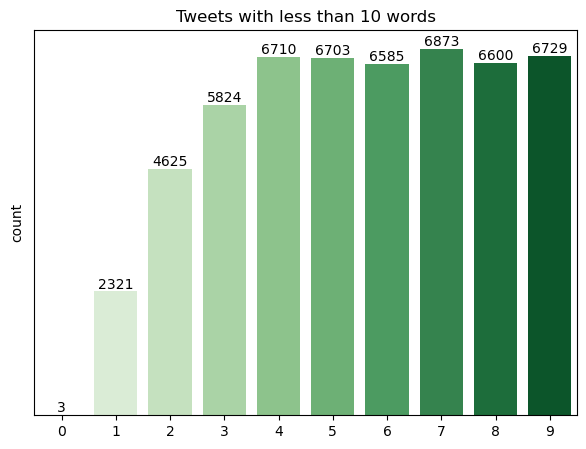

In [44]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='Greens')

plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [45]:
df.shape

(236023, 5)

In [46]:
df.columns

Index(['tweet_created_at', 'text', 'text_clean_deeper', 'Sentiment',
       'text_len'],
      dtype='object')

In [47]:
df = df[df['text_len'] > 1]

In [48]:
df.shape

(233699, 5)

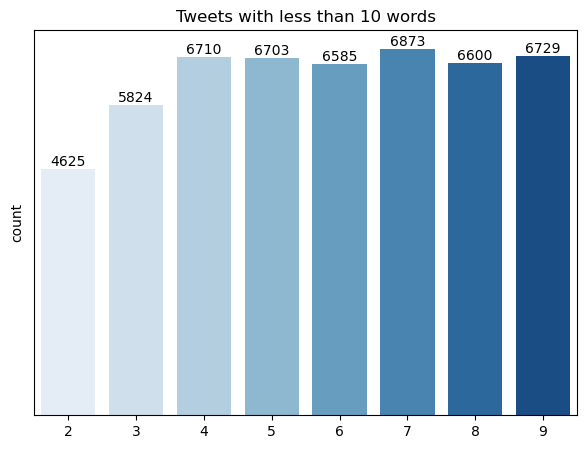

In [49]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='Blues')

plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [50]:
token_lens = []

for txt in df['text_clean_deeper'].values:
    tokens = tokenizer_4.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [51]:
print(f"Longest tokenized sentence: {max_len}")

Longest tokenized sentence: 483


In [52]:
token_lens = []

for i,txt in enumerate(df['text_clean_deeper'].values):
    tokens = tokenizer_4.encode(txt, max_length=512, truncation=True)
    
    token_lens.append(len(tokens))
    
    if len(tokens)>100:
        
        print(f"INDEX: {i}, TEXT: {txt}")  

INDEX: 3079, TEXT: stream ndi ndi by vicmass luodollar available on spotify youtube boomplay apple music audiomack mdundo deezer itunes youtube music etc click link below kcpe duale riggy g amerix kipkorir amerix david maraga maasai shoe size dubai chart increasing play or pause button play or pause button play or pause button play or pause button play or pause button play or pause button play or pause button play or pause button play or pause button
INDEX: 4737, TEXT: amerixtoday i am going to harvest sweet potatoes from the farm next to my sons school womenheheheeand u are advising men not to be attached 2 their children and here u are mentioning ua son mentake charge of your sons beaming face with smiling eyes grinning squinting face grinning squinting face squinting face with tongue squinting face with tongue starstruck starstruck loudly crying face loudly crying face beaming face with smiling eyes grinning squinting face grinning squinting face speaknoevil monkey face with hand ov

In [53]:
df['token_lens'] = token_lens

In [54]:
df.head(20)

,tweet_created_at,text,text_clean_deeper,Sentiment,text_len,token_lens
0,2022-12-30 22:37:46+00:00,Men who have refused to listen to/attend @amer...,men who have refused to listen toattend classe...,Negative,36,43
1,2022-12-30 22:30:58+00:00,@OvOBrezzzy Take amerix next,take amerix next,Neutral,3,4
2,2022-12-30 22:18:00+00:00,@AyodeleYo11 @amerix Nah I’m good my masculini...,nah im good my masculinity health and wellness...,Positive,12,13
3,2022-12-30 20:42:54+00:00,@Amerix_DontSimp There is no need for dating i...,there is no need for dating in the first place,Negative,10,10
4,2022-12-30 20:32:23+00:00,@DyeAnna7 @amerix @kibe From what cos nothing ...,from what cos nothing is changing and if we go...,Positive,45,46
5,2022-12-30 20:25:56+00:00,@salim_the_don @MwendiaJnr I see you unblocked...,i see you unblocked me one minute uko kwa amer...,Negative,66,84
6,2022-12-30 20:22:24+00:00,@german_kenyan @ML_Philosophy 🤣 yes they are a...,yes they are also those who can cook i would r...,Negative,52,59
7,2022-12-30 20:10:49+00:00,@PadreMusa Amerix once said the alcohol menace...,amerix once said the alcohol menace is wreckin...,Negative,46,50
8,2022-12-30 19:36:49+00:00,"@DodoPicard You're in Eastafrica, he probably ...",youre in eastafrica he probably knows amerix,Neutral,7,11
10,2022-12-30 19:24:08+00:00,Amerix student of the year,amerix student of the year,Neutral,5,6


In [55]:
df = df.sort_values(by='token_lens', ascending=False)

In [56]:
df.head(20)

,tweet_created_at,text,text_clean_deeper,Sentiment,text_len,token_lens
14286,2022-12-18 17:03:59+00:00,@amerix 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,man i love a good satire account calling selfi...,Positive,482,483
5505,2022-12-21 15:32:00+00:00,@filip_254 @syrus_tama @amerix Use your block ...,use your block button if my 5 emojis ruined yo...,Negative,301,303
181177,2022-10-15 15:06:17+00:00,Let us plant Trees 🌴🌲🌲🌲🌴🌴🌴🌲🌲🌲🌲🌴🌴🌴🌴🌴🌴🌲🌲🌲🌲🌲🌴...,let us plant trees masculinitysaturday palm tr...,Neutral,241,245
166347,2022-12-24 18:27:40+00:00,When Bae has you in your feelings like 😍😍😁😘😘👫💏...,when bae has you in your feelings like masculi...,Positive,232,243
108948,2022-10-05 23:55:55+00:00,@DTNEtiquette K I can do that....😀😀😀😀😀😀😀😀😀😀😀😀😀...,k i can do that i have extra ones to share bet...,Positive,226,227
145636,2022-07-07 22:07:24+00:00,38 items and counting. Truly can’t believe how...,38 items and counting truly cant believe how c...,Positive,153,165
8167,2022-12-20 08:21:46+00:00,💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚 💚💚💚💚💚YESTERDAY FIXED GAMES ...,yesterday fixed games won successfully as expe...,Positive,150,162
29232,2022-12-07 07:31:58+00:00,@amerix @RailaOdinga unfat\n@AtwoliDza unfat o...,unfat unfat old man my friendunfat unfat sir u...,Neutral,154,161
164578,2022-05-03 02:48:27+00:00,@ThingsSwimming @LadyAndromeda @swimhardy @Row...,thank you for this 7th grade ss teacher trying...,Positive,141,152
5033,2022-12-21 19:39:14+00:00,@ValOnchari @amerix Amerix:Today I am going to...,amerixtoday i am going to harvest sweet potato...,Positive,137,149


In [57]:
df = df.iloc[12:]

In [58]:
df.head(20)

,tweet_created_at,text,text_clean_deeper,Sentiment,text_len,token_lens
154462,2022-06-08 11:44:34+00:00,🗣Wishing the @CobbSchools @CobbInTech team the...,wishing the team the best today the team has i...,Positive,112,143
98658,2022-11-07 22:49:01+00:00,💦 ALL HUMANS are #BetterTogether\n👋🏼✊🏿✌🏾🤜🏻🤛🏽👍🏼...,all humans are bettertogether voteblue resist ...,Neutral,94,141
73057,2022-10-29 05:34:53+00:00,"@Jordn_mu @amerix @Drayk___ Lemme retweet, sha...",lemme retweet share screenshot and tag this fe...,Positive,136,140
124877,2022-08-21 23:58:59+00:00,Keep PUSHING. Multiple AEDs are so important f...,keep pushing multiple aeds are so important fo...,Positive,121,135
99068,2022-11-06 02:45:54+00:00,🤣🤣🤣🤣🤣🤣🤣🤣🤣 this is my only points slip this was...,this is my only points slip this was 80k this ...,Positive,116,134
137921,2022-07-27 03:07:14+00:00,"If you’re seeing this, I want you to have the ...",if youre seeing this i want you to have the be...,Positive,128,133
40390,2022-11-29 17:24:36+00:00,@amerix \n🫢🫢🫢🫢🫢🫢🫢😮😮😮😮😮😮😮😮😮😮😮 what prescription...,what prescription is this for diabetes whether...,Negative,128,133
143110,2022-07-15 11:44:42+00:00,Ok now I can reveal the weekend wishlist drop....,ok now i can reveal the weekend wishlist drop ...,Positive,118,132
6918,2022-12-20 17:08:20+00:00,@oldagepoopman35 @amerix Nbr of flags in 5011 ...,nbr of flags in 5011 usernames who liked 279 3...,Positive,95,131
148347,2022-06-29 01:29:41+00:00,Any help would be forever appreciated. Even a ...,any help would be forever appreciated even a r...,Positive,118,131


In [59]:
df['Sentiment'].value_counts()

Positive    129190
Neutral      63091
Negative     41406
Name: Sentiment, dtype: int64

In [60]:
df['Sentiment'] = df['Sentiment'].map({'Negative':0,'Positive':1,'Neutral':2})

In [61]:
df.head()

,tweet_created_at,text,text_clean_deeper,Sentiment,text_len,token_lens
154462,2022-06-08 11:44:34+00:00,🗣Wishing the @CobbSchools @CobbInTech team the...,wishing the team the best today the team has i...,1,112,143
98658,2022-11-07 22:49:01+00:00,💦 ALL HUMANS are #BetterTogether\n👋🏼✊🏿✌🏾🤜🏻🤛🏽👍🏼...,all humans are bettertogether voteblue resist ...,2,94,141
73057,2022-10-29 05:34:53+00:00,"@Jordn_mu @amerix @Drayk___ Lemme retweet, sha...",lemme retweet share screenshot and tag this fe...,1,136,140
124877,2022-08-21 23:58:59+00:00,Keep PUSHING. Multiple AEDs are so important f...,keep pushing multiple aeds are so important fo...,1,121,135
99068,2022-11-06 02:45:54+00:00,🤣🤣🤣🤣🤣🤣🤣🤣🤣 this is my only points slip this was...,this is my only points slip this was 80k this ...,1,116,134


In [62]:
df.columns

Index(['tweet_created_at', 'text', 'text_clean_deeper', 'Sentiment',
       'text_len', 'token_lens'],
      dtype='object')

In [63]:
df = df[['tweet_created_at', 'text_clean_deeper', 'Sentiment']]

In [64]:
df.columns

Index(['tweet_created_at', 'text_clean_deeper', 'Sentiment'], dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233687 entries, 154462 to 17279
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   tweet_created_at   233687 non-null  datetime64[ns, UTC]
 1   text_clean_deeper  233687 non-null  object             
 2   Sentiment          233687 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 7.1+ MB


In [66]:
df.to_csv('amerix_smsa_adv_emoji_ecoded_data.csv')